In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
pd.set_option('display.max_colwidth',120)
pd.get_option('display.max_colwidth')

120

In [3]:
train_data = pd.read_csv('Processed_Sentiment Analysis Dataset.csv',encoding='utf8',index_col='ItemID')

C:\Users\anand\Anaconda3\envs\master_project\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
train_data.head()

,Sentiment,SentimentSource,SentimentText
ItemID,,,
1,0,Sentiment140,is so sad for my APL friend.............
2,0,Sentiment140,I missed the New Moon trailer...
3,1,Sentiment140,omg its already 7:30 :O
4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown pu...
5,0,Sentiment140,i think mi bf is cheating on me!!! T_T


In [5]:
train_data.dtypes

Sentiment           int64
SentimentSource    object
SentimentText      object
dtype: object

In [6]:
train_data.SentimentText = train_data.SentimentText.str.strip()

In [7]:
train_data.SentimentText.head()

ItemID
1                                                                                   is so sad for my APL friend.............
2                                                                                           I missed the New Moon trailer...
3                                                                                                    omg its already 7:30 :O
4    .. Omgaga. Im sooo  im gunna CRy. I've been at this dentist since 11.. I was suposed 2 just get a crown put on (30mi...
5                                                                               i think mi bf is cheating on me!!!       T_T
Name: SentimentText, dtype: object

In [8]:
train_data.shape

(1578614, 3)

In [9]:
%matplotlib inline

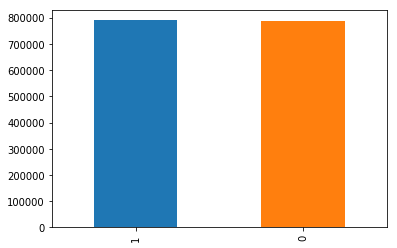

In [10]:
train_data_plot = train_data.Sentiment.value_counts().plot(kind='bar')

In [11]:
fig = train_data_plot.get_figure()
fig.set_size_inches(18.5,10.5)
fig.savefig('train_data_plot.png',format='png',dpi=100)

In [12]:
train_data.Sentiment.value_counts()

1    790178
0    788436
Name: Sentiment, dtype: int64

In [13]:
tweet = []
for t in train_data.SentimentText:
    text = t.split()
    text = ' '.join(text)
    tweet.append(text)
train_data.SentimentText = tweet

In [14]:
tweet = []
url = re.compile('https?://[\\w\.//]*',flags=re.IGNORECASE)
for text in train_data.SentimentText:
    text = re.sub(url,"",text)
    tweet.append(text)
train_data.SentimentText = tweet

In [15]:
train_data.SentimentText[66]

'- I love you guys so much that it hurts. '

In [16]:
html_entities = re.compile('&[A-Za-z0-9]+;',flags=re.IGNORECASE)
tweet = []
for text in train_data.SentimentText:
    text = re.sub(html_entities,'',text)
    tweet.append(text)
train_data.SentimentText = tweet

In [17]:
text = train_data.SentimentText[24479]
print(text)
#Remove mentions from the tweets
pat = re.compile('\W?@[A-z0-9_]+\W')
print(re.sub(pat,' ',text))

@1Omarion PLEASE SAY HI TO ME AND @TheodoraBagwell she is upset that u are not tweeting to her n she is a BIG fan!
 PLEASE SAY HI TO ME AND she is upset that u are not tweeting to her n she is a BIG fan!


In [18]:
train_data.to_csv(path_or_buf='Processed_Sentiment Analysis Dataset 2.csv',index=False,encoding='utf-8',columns=["Sentiment","SentimentText"])

In [19]:
train_data.shape

(1578614, 3)

In [23]:
url = re.compile('https?://\s',flags=re.IGNORECASE)
re.match(url,'http://tinyurl.com/cj2dx8 im excited ')